In [1]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

# TPN - Tropical Polynomial Network     (piecewise linear convex function)
# TRN - Tropical Rational Network       (any piecewise linear function)

In [2]:
def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)

In [3]:
class ConvexLayer(nn.Module):
    def __init__(self, dim_in, dim_out, dim_id):
        super(ConvexLayer, self).__init__()
        self.Wx = nn.Parameter(torch.log(torch.rand(dim_in, dim_out)))
        self.b = nn.Parameter(torch.randn(dim_out))
        self.Wid = nn.Parameter(torch.randn(dim_id, dim_out))
    
    def forward(self, x, id):
        x = torch.matmul(x, torch.exp(self.Wx))
        x += self.b
        x += torch.matmul(id, self.Wid)
        return x

In [4]:
class TPN(nn.Module):
    def __init__(self, dims):
        super(TPN, self).__init__()
        self.layers = nn.ModuleList([ConvexLayer(dims[i-1], dims[i], dims[0]) for i in range(1,len(dims))])
    
    def forward(self, x):
        ret = x
        for layer in self.layers:
            ret = layer(ret, x)
        return ret

In [5]:
class TRN(nn.Module):
    def __init__(self, dims):
        super(TRN, self).__init__()
        self.TPN_plus = TPN(dims)
        self.TPN_minus = TPN(dims)
    
    def forward(self, x):
        return self.TPN_plus(x) - self.TPN_minus(x)

In [6]:
class TropicalReduction(nn.Module):
    def __init__(self, TPN, data):
        super(TropicalReduction, self).__init__()
        #TODO


In [7]:
NPOINTS = 1000
NOISE = 0

In [8]:
SLOPES = np.array([[-1,2],
                    [1,1],
                    [3,0]])

def generate_convex_data(slopes=SLOPES, npoints=NPOINTS, noise=NOISE):
    rand = np.random
    Xs = rand.uniform(0, 1, (npoints, 2))
    Ys = np.matmul(slopes, Xs.transpose())
    Ys = np.max(Ys, axis=0)
    Ys += rand.uniform(-noise, noise, npoints)
    return Xs, Ys


In [9]:
POLYNOMIAL=lambda x: 5*((x[0]-0.25)**2 + (x[1]-0.25)**2) - 10*((x[0]-0.75)**2 + (x[1]-0.75)**2)

def generate_poly_data(polynomial=POLYNOMIAL, npoints=NPOINTS, noise=NOISE):
    rand = np.random
    Xs = rand.uniform(0, 1, (npoints, 2))
    Ys = np.apply_along_axis(polynomial, 1, Xs)
    Ys += rand.uniform(-noise, noise, npoints)
    return Xs, Ys


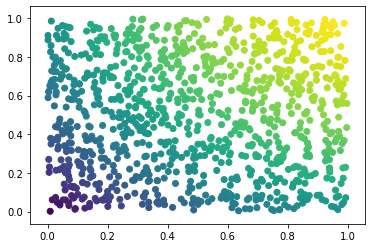

In [10]:
Xs, Ys = generate_poly_data()
plt.scatter(x=Xs[:, 0], y=Xs[:, 1], c=Ys)

In [11]:
X_train = Xs[:int(0.7*NPOINTS), :]
y_train = Ys[:int(0.7*NPOINTS)]
X_test = Xs[-int(0.3*NPOINTS):, :]
y_test = Ys[-int(0.3*NPOINTS):]

In [12]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.squeeze(torch.from_numpy(y_train).float())
X_test = torch.from_numpy(X_test).float()
y_test = torch.squeeze(torch.from_numpy(y_test).float())

In [13]:
net = TPN(np.array([2,10,1]))

In [14]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [15]:
EPOCHS = 1000
EPOCH_DISP = 100
for epoch in range(EPOCHS):
    y_pred = net(X_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    if epoch % EPOCH_DISP == 0:
        y_test_pred = net(X_test)
        y_test_pred = torch.squeeze(y_test_pred)
        test_loss = criterion(y_test_pred, y_test)
        print(

f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}
Test  set - loss: {round_tensor(test_loss)}
''')

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

epoch 0
Train set - loss: 17.936
Test  set - loss: 19.347

epoch 100
Train set - loss: 10.665
Test  set - loss: 11.737

epoch 200
Train set - loss: 7.929
Test  set - loss: 8.696

epoch 300
Train set - loss: 6.581
Test  set - loss: 7.153

epoch 400
Train set - loss: 5.434
Test  set - loss: 5.906

epoch 500
Train set - loss: 4.24
Test  set - loss: 4.643

epoch 600
Train set - loss: 3.055
Test  set - loss: 3.387

epoch 700
Train set - loss: 1.991
Test  set - loss: 2.249

epoch 800
Train set - loss: 1.169
Test  set - loss: 1.354

epoch 900
Train set - loss: 0.651
Test  set - loss: 0.77



In [16]:
slopes = list()
for X in X_test:
    X.requires_grad = True
    Y = net(X)
    slopes.append(torch.autograd.grad(outputs=Y, inputs=X))

In [17]:
slopes

[(tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([6.8189, 6.5240]),),
 (tensor([

In [18]:
net = TRN(np.array([2,10,1]))
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS = 1000
EPOCH_DISP = 100
for epoch in range(EPOCHS):
    y_pred = net(X_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    if epoch % EPOCH_DISP == 0:
        y_test_pred = net(X_test)
        y_test_pred = torch.squeeze(y_test_pred)

        test_loss = criterion(y_test_pred, y_test)
        print(

f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}
Test  set - loss: {round_tensor(test_loss)}
''')

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

epoch 0
Train set - loss: 24.7
Test  set - loss: 26.677

epoch 100
Train set - loss: 15.577
Test  set - loss: 16.39

epoch 200
Train set - loss: 10.69
Test  set - loss: 11.301

epoch 300
Train set - loss: 7.191
Test  set - loss: 7.693

epoch 400
Train set - loss: 4.531
Test  set - loss: 4.931

epoch 500
Train set - loss: 2.597
Test  set - loss: 2.895

epoch 600
Train set - loss: 1.35
Test  set - loss: 1.552

epoch 700
Train set - loss: 0.681
Test  set - loss: 0.804

epoch 800
Train set - loss: 0.398
Test  set - loss: 0.465

epoch 900
Train set - loss: 0.306
Test  set - loss: 0.34

